In [1]:
import numpy as np

def smooth_tensorboard(values, smooth_factor=0.6):
    smoothed_values = np.zeros_like(values)
    num_runs, num_points = values.shape
    
    for i in range(num_runs):
        last_value = values[i, 0]  # Initialize with the first value for each run
        smoothed_values[i, 0] = last_value
        for j in range(1, num_points):
            smoothed_value = last_value * smooth_factor + (1 - smooth_factor) * values[i, j]
            smoothed_values[i, j] = smoothed_value
            last_value = smoothed_value
    
    return smoothed_values

def sliding_window_smooth(values, window_size=5):
    num_runs, num_points = values.shape
    new_num_points = num_points // window_size  # Number of windows per run
    smoothed_values = np.zeros((num_runs, new_num_points))

    for i in range(num_runs):
        for j in range(new_num_points):
            # Compute the average of each non-overlapping window
            start_idx = j * window_size
            end_idx = start_idx + window_size
            smoothed_values[i, j] = np.mean(values[i, start_idx:end_idx])
    
    return smoothed_values

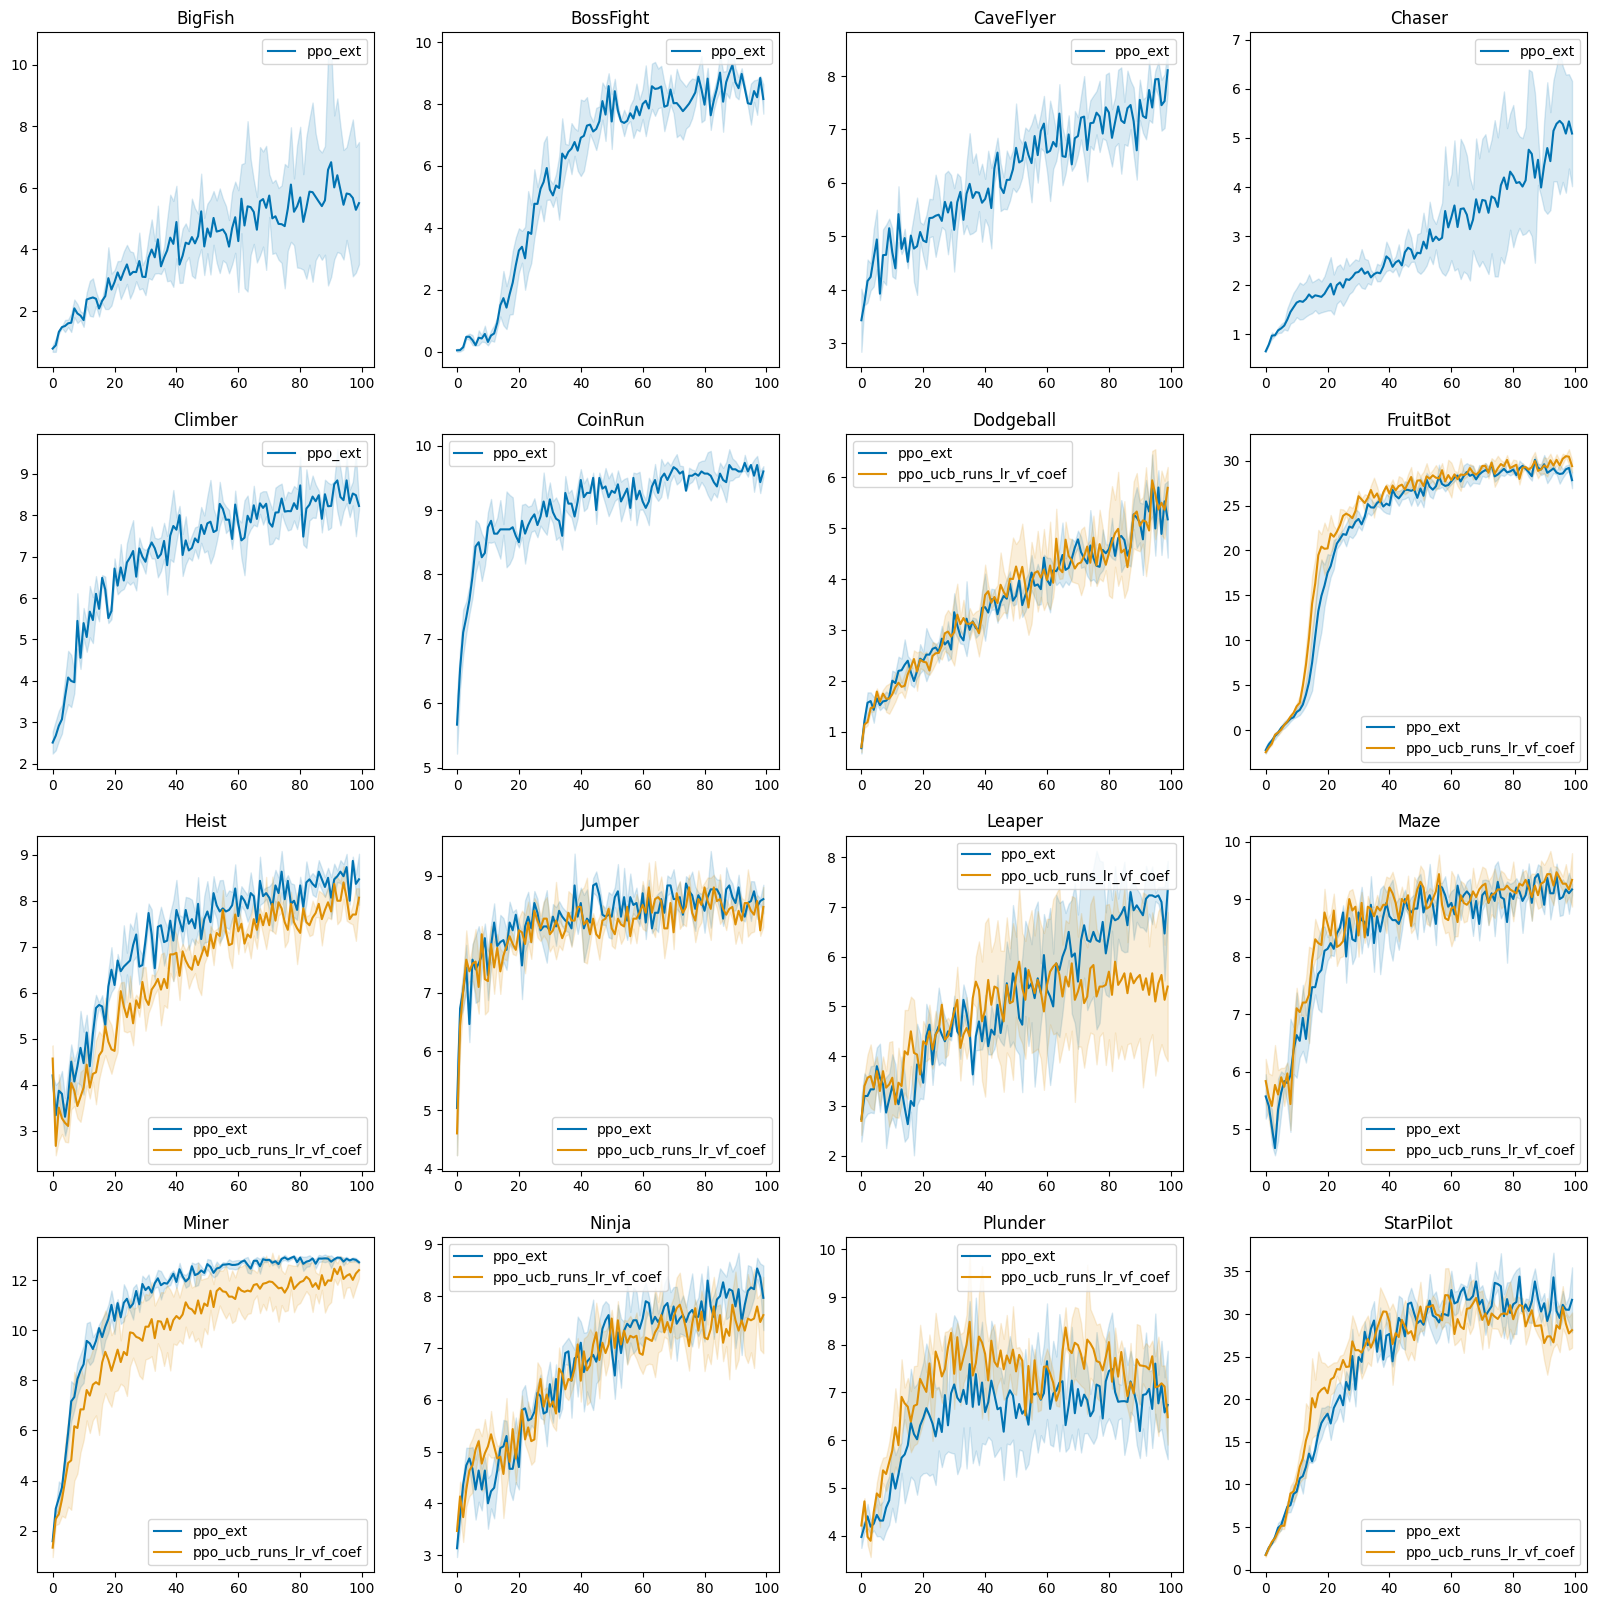

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

envs = ['bigfish', 'bossfight', 'caveflyer', 'chaser', 'climber', 'coinrun', 'dodgeball', 'fruitbot',
        'heist', 'jumper', 'leaper', 'maze', 'miner', 'ninja', 'plunder', 'starpilot'
        ]
names = ['BigFish', 'BossFight', 'CaveFlyer', 'Chaser', 'Climber', 'CoinRun', 'Dodgeball', 'FruitBot',
            'Heist', 'Jumper', 'Leaper', 'Maze', 'Miner', 'Ninja', 'Plunder', 'StarPilot'
        ]

fig, axes = plt.subplots(4, 4, figsize=(20, 20))

colors = sns.color_palette("colorblind")
algos = ['ppo_ext', 'ppo_ucb_runs_lr_vf_coef']

for idx, env in enumerate(envs):
    ax = axes.flatten()[idx]
    for j, algo in enumerate(algos):
        root = f'../data/{algo}'
        all_returns = []
        for dir in os.listdir(root):
            if env in dir:
                data = np.load(os.path.join(root, dir), allow_pickle=True)
                steps = data["steps"].item()
                values = data["data"].item()
                all_returns.append(values['charts/episodic_return'])

        try:
            all_returns = np.stack(all_returns)
            all_returns = sliding_window_smooth(all_returns, 100)
            # print(algo, env, all_returns.shape)
            mean = all_returns.mean(axis=0)
            std = all_returns.std(axis=0)

            ax.plot(np.arange(mean.shape[0]), mean, color=colors[j], label=algo)
            ax.fill_between(np.arange(mean.shape[0]), mean+std, mean-std, alpha=0.15, color=colors[j])
        except:
            pass

    ax.set_title(names[idx])
    ax.legend()

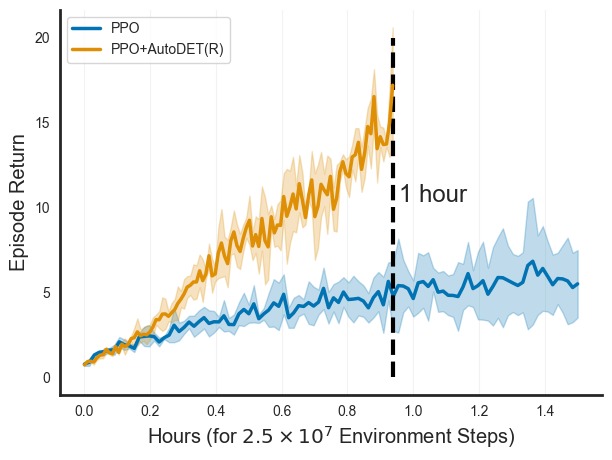

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

envs = ['bigfish', 'bossfight', 'caveflyer', 'chaser', 'climber', 'coinrun', 'dodgeball', 'fruitbot',
        'heist', 'jumper', 'leaper', 'maze', 'miner', 'ninja', 'plunder', 'starpilot'
        ]
names = ['BigFish', 'BossFight', 'CaveFlyer', 'Chaser', 'Climber', 'CoinRun', 'Dodgeball', 'FruitBot',
            'Heist', 'Jumper', 'Leaper', 'Maze', 'Miner', 'Ninja', 'Plunder', 'StarPilot'
        ]

sns.set_style('white')
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
colors = sns.color_palette("colorblind")
algos = ['ppo_ext', 'ppo_rr']
labels = ['PPO', 'PPO+AutoDET(R)']

for idx, env in enumerate(envs[:1]):
    # ax = axes.flatten()[idx]
    for j, algo in enumerate(algos):
        root = f'data/{algo}'
        all_returns = []
        for dir in os.listdir(root):
            if env in dir:
                data = np.load(os.path.join(root, dir), allow_pickle=True)
                steps = data["steps"].item()
                values = data["data"].item()
                all_returns.append(values['charts/episodic_return'])
        all_returns = np.stack(all_returns)

        all_returns = sliding_window_smooth(all_returns, 100)
        # print(algo, env, all_returns.shape)
        mean = all_returns.mean(axis=0)
        std = all_returns.std(axis=0)

        if algo == 'ppo_rr':
            xticks = np.linspace(0, 1.5 * 0.625, mean.shape[0])
            ax.vlines(1.5 * 0.625, 0, 20, color='black', linestyle='--', linewidth=3)
        else:
            xticks = np.linspace(0, 1.5, mean.shape[0])
        ax.plot(xticks, mean, color=colors[j], label=labels[j], linewidth=2.5)
        ax.fill_between(xticks, mean+std, mean-std, alpha=0.25, color=colors[j])

ax.set_title(None)
ax.legend(loc='upper left')
# ax.set_xlabel(r'Environment Steps $(\times10^7)$', fontsize='x-large')
ax.set_xlabel(r'Hours (for $2.5\times10^7$ Environment Steps)', fontsize='x-large')
ax.set_ylabel('Episode Return', fontsize='x-large')
ax.text(0.625, 0.5, '1 hour', fontsize='xx-large', transform=ax.transAxes)

ax.grid(True, axis="x", alpha=0.25)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
    

fig.savefig('preface.pdf', dpi=300, bbox_inches='tight')

ppo_ext (16, 100)
ppo_rr (16, 100)
ppo_rr_5321 (16, 100)
ppo_ucb_runs_c=5.0_w=10 (16, 100)
ppo_ucb_5321 (16, 100)
ppo_ts_runs_w10 (16, 100)
ppo_ts_5321 (16, 100)


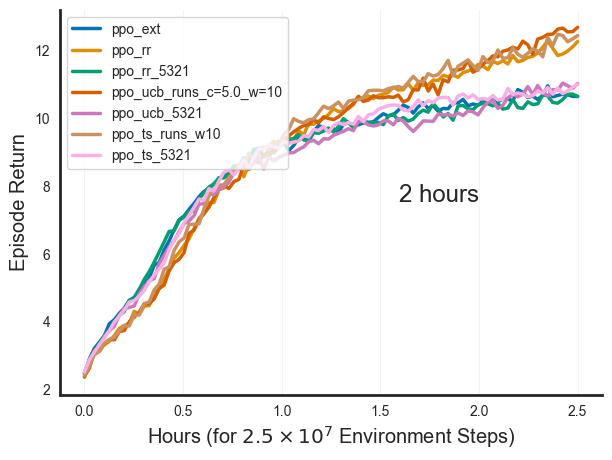

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

envs = ['bigfish', 'bossfight', 'caveflyer', 'chaser', 'climber', 'coinrun', 'dodgeball', 'fruitbot',
        'heist', 'jumper', 'leaper', 'maze', 'miner', 'ninja', 'plunder', 'starpilot'
        ]
names = ['BigFish', 'BossFight', 'CaveFlyer', 'Chaser', 'Climber', 'CoinRun', 'Dodgeball', 'FruitBot',
            'Heist', 'Jumper', 'Leaper', 'Maze', 'Miner', 'Ninja', 'Plunder', 'StarPilot'
        ]

sns.set_style('white')
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
colors = sns.color_palette("colorblind")
algos = [
    # 'ppo_ts_runs_w50_a=0.1', 'ppo_ts_runs_w50_a=0.5', 'ppo_ts_runs_w50'
    'ppo_ext', 
    'ppo_rr', 'ppo_rr_5321',
    'ppo_ucb_runs_c=5.0_w=10', 'ppo_ucb_5321',
    'ppo_ts_runs_w10', 'ppo_ts_5321'
    ]
# labels = ['PPO', 'PPO+AutoDET(R)', 'PPO+AutoDET(T)', 'PPO+AutoDET(U)']

for j, algo in enumerate(algos):
    root = f'../data/pg_ppo/{algo}'
    all_returns = []
    for idx, env in enumerate(envs):
        env_all_returns = []
        for dir in os.listdir(root):
            if env in dir:
                data = np.load(os.path.join(root, dir), allow_pickle=True)
                steps = data["steps"].item()
                values = data["data"].item()
                env_all_returns.append(values['charts/episodic_return'])
        env_all_returns = np.stack(env_all_returns)
        # env_all_returns = sliding_window_smooth(env_all_returns, 100)
        # print(algo, env, env_all_returns.shape)
        all_returns.append(env_all_returns.mean(axis=0))
    
    all_returns = np.stack(all_returns)
    all_returns = sliding_window_smooth(all_returns, 100)
    print(algo, all_returns.shape)
    mean = all_returns.mean(axis=0)
    std = all_returns.std(axis=0) / np.sqrt(all_returns.shape[0])

    xticks = np.linspace(0, 2.5, mean.shape[0])
    ax.plot(xticks, mean, color=colors[j], label=algos[j], linewidth=2.5)
    # ax.fill_between(xticks, mean+std, mean-std, alpha=0.25, color=colors[j])

ax.set_title(None)
ax.legend(loc='upper left')
# ax.set_xlabel(r'Environment Steps $(\times10^7)$', fontsize='x-large')
ax.set_xlabel(r'Hours (for $2.5\times10^7$ Environment Steps)', fontsize='x-large')
ax.set_ylabel('Episode Return', fontsize='x-large')
ax.text(0.625, 0.5, '2 hours', fontsize='xx-large', transform=ax.transAxes)

ax.grid(True, axis="x", alpha=0.25)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
# fig.savefig('preface.pdf', dpi=300, bbox_inches='tight')

In [2]:
import numpy as np
import os, pickle

envs = ['bigfish', 'bossfight', 'caveflyer', 'chaser', 'climber', 'coinrun', 'dodgeball', 'fruitbot',
        'heist', 'jumper', 'leaper', 'maze', 'miner', 'ninja', 'plunder', 'starpilot'
        ]
names = ['BigFish', 'BossFight', 'CaveFlyer', 'Chaser', 'Climber', 'CoinRun', 'Dodgeball', 'FruitBot',
            'Heist', 'Jumper', 'Leaper', 'Maze', 'Miner', 'Ninja', 'Plunder', 'StarPilot'
        ]

algos = ['ppo_ext', 'ppo_rr', 
         'ppo_ucb_runs_c=0.1_w=10', 'ppo_ucb_runs_c=1.0_w=10', 'ppo_ucb_runs_c=5.0_w=10',
         'ppo_ucb_runs_c=5.0_w=50', 'ppo_ucb_runs_c=5.0_w=100',
         'ppo_ts_runs_w5', 'ppo_ts_runs_w10', 'ppo_ts_runs_w50', 'ppo_ts_runs_w100', 'ppo_ts_runs_w50_a=0.5', 'ppo_ts_runs_w50_a=0.1'
         ]

all_returns_data = {key: {e: None for e in envs} for key in algos}
all_ue_data = {key: {e: None for e in envs} for key in algos}

for idx, env in enumerate(envs):
    for j, algo in enumerate(algos):
        root = f'../data/pg_ppo/{algo}'
        all_returns = []
        all_update_epochs = []
        for dir in os.listdir(root):
            if env in dir:
                data = np.load(os.path.join(root, dir), allow_pickle=True)
                steps = data["steps"].item()
                values = data["data"].item()
                all_returns.append(values['charts/episodic_return'])
                if algo == 'ppo_ext':
                    all_update_epochs.append(np.ones((1525, )) * 3)
                else:
                    all_update_epochs.append(values['charts/update_epochs'])
        all_returns = np.stack(all_returns)
        all_update_epochs = np.stack(all_update_epochs)
        print(algo, env, all_returns.shape, all_update_epochs.shape)

        all_returns_data[algo][env] = all_returns
        all_ue_data[algo][env] = all_update_epochs

with open('all_pg_ppo_data.pkl', 'wb') as f:
    pickle.dump({'returns': all_returns_data, 'update_epochs': all_ue_data}, f)

ppo_ext bigfish (3, 10000) (3, 1525)
ppo_rr bigfish (3, 10000) (3, 1525)
ppo_ucb_runs_c=0.1_w=10 bigfish (3, 10000) (3, 1525)
ppo_ucb_runs_c=1.0_w=10 bigfish (3, 10000) (3, 1525)
ppo_ucb_runs_c=5.0_w=10 bigfish (3, 10000) (3, 1525)
ppo_ucb_runs_c=5.0_w=50 bigfish (3, 10000) (3, 1525)
ppo_ucb_runs_c=5.0_w=100 bigfish (3, 10000) (3, 1525)
ppo_ts_runs_w5 bigfish (3, 10000) (3, 1525)
ppo_ts_runs_w10 bigfish (3, 10000) (3, 1525)
ppo_ts_runs_w50 bigfish (3, 10000) (3, 1525)
ppo_ts_runs_w100 bigfish (3, 10000) (3, 1525)
ppo_ts_runs_w50_a=0.5 bigfish (3, 10000) (3, 1525)
ppo_ts_runs_w50_a=0.1 bigfish (3, 10000) (3, 1525)
ppo_ext bossfight (3, 10000) (3, 1525)
ppo_rr bossfight (3, 10000) (3, 1525)
ppo_ucb_runs_c=0.1_w=10 bossfight (3, 10000) (3, 1525)
ppo_ucb_runs_c=1.0_w=10 bossfight (3, 10000) (3, 1525)
ppo_ucb_runs_c=5.0_w=10 bossfight (3, 10000) (3, 1525)
ppo_ucb_runs_c=5.0_w=50 bossfight (3, 10000) (3, 1525)
ppo_ucb_runs_c=5.0_w=100 bossfight (3, 10000) (3, 1525)
ppo_ts_runs_w5 bossfight (